# Donald Trump's Social Media Sentiment Analysis

Donald Trump's approval ratings have dropped to a dismal 39.1% in May 2017. As one of the most controversial characters in the spotlight, his social media channels are a treasure trove for sentiment analysis. 

- What posts or tweets attract the most reactions from his followers? Are there patterns or clusters in the posts?
- Are his critics more vicious on [Facebook](https://www.facebook.com/DonaldTrump/) and [Twitter](https://twitter.com/realDonaldTrump)?

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('DonaldTrump_facebook_comments1.csv')

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
#let's take a look at the dataset 

df.head()

,comment_id,status_id,parent_id,comment_message,comment_author,comment_published,comment_likes
0,10159167535600725_10159167536690725,153080620724_10159167535600725,NaN,"""I just fired the head of the FBI. He was craz...",William Peterson,20/5/17 9:32,56
1,10159167535600725_10159167539020725,153080620724_10159167535600725,10159167535600725_10159167536690725,Correct....Comey the nut job,CJ Ayers,20/5/17 9:33,18
2,10159167535600725_10159167541255725,153080620724_10159167535600725,10159167535600725_10159167536690725,Our wonderful President is awesome unlike Huss...,George White,20/5/17 9:33,14
3,10159167535600725_10159167543000725,153080620724_10159167535600725,10159167535600725_10159167536690725,Correct. I would add destroying evidence.,Ion Marian,20/5/17 9:34,3
4,10159167535600725_10159167544205725,153080620724_10159167535600725,10159167535600725_10159167536690725,#maga,April Thomas Kimbrell,20/5/17 9:34,7


In [27]:
#creating polarity variable 

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
corpus = []
for i in range(0, 4247):
    review = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", df['comment_message'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    blob = TextBlob(review)
    blob_s = blob.sentiment.polarity
    corpus.append(blob_s)
    
corpus_sub = np.array(corpus)

polarity = pd.DataFrame(corpus_sub)

df['polarity'] = polarity


In [5]:
#creating polarity variable 

corpus = []
for i in range(0, 4247):
    review = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", df['comment_message'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    blob = TextBlob(review)
    blob_s1 = blob.sentiment.subjectivity
    corpus.append(blob_s1)
    
corpus_sub1 = np.array(corpus)

subjectivity = pd.DataFrame(corpus_sub1)

df['subjectivity'] = subjectivity

In [38]:
#recoding polarity into 3 categories  

def days_late_xform(dl):
    if dl > 0.3: return 'Positive'
    elif -0.3 < dl <= 0.3: return 'Neutral'
    elif dl <= -0.3: return 'Negative'
    
df['fb_polarity'] = df['polarity'].map(days_late_xform)
print df['fb_polarity'].value_counts()


Neutral     3082
Positive    839 
Negative    326 
Name: fb_polarity, dtype: int64


In [7]:
#recoding subjectivity into 3 categories  

def days_late_xform1(dl):
    if dl > 0.5: return 'Positive'
    elif dl <= 0.5: return 'Negative'
    
df['subjectivity_r'] = df['subjectivity'].map(days_late_xform1)


print df.subjectivity_r.value_counts()

Negative    2991
Positive    1256
Name: subjectivity_r, dtype: int64


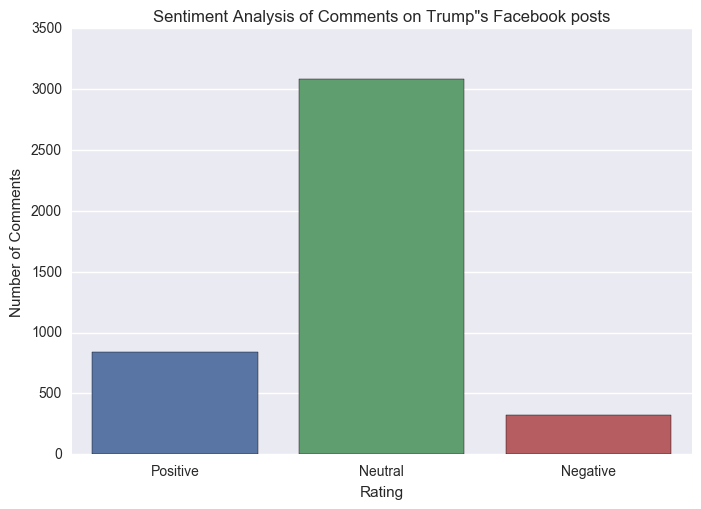

In [29]:
#what percentage of facebook comments on Trump's posts are negative? 

import seaborn as sns
plt.subplot(1, 2, 1)

sns.set_style("darkgrid")
ax = sns.countplot(x="fb_polarity", data=df)
ax.set(xlabel='Rating', ylabel='Number of Comments')
sns.plt.title('Sentiment Analysis of Comments on Trump"s Facebook posts')


In [18]:
#what exactly are these facebook comments that are rated as negative? 

pd.set_option('display.max_colwidth', -1)

s = df.loc[df['polarity_r'] == 'Negative']
print s['comment_message']

11      Where's the proof idiot                                                                                                                                                                                                                                                                     
13      Childish insults from Trumpsters...just like their Orange hero.....sad but predictable.\n\nhttps://www.nytimes.com/interactive/2016/01/28/upshot/donald-trump-twitter-insults.html?_r=0                                                                                                     
18      Comey said it never happened on May 3. Why did he change his mind by the 8th and think real hard.                                                                                                                                                                                           
37      Look at the people who hate on Trump...they are literally mentally ill. They run with those who normalize grown m

How would this compare against Twitter?

In [54]:
#let's load up some twitter data 

tweets = pd.read_csv('trump18000.csv')
tweets.tail()

,Created-At,From-User,From-User-Id,To-User,To-User-Id,Language,Source,Text,Geo-Location-Latitude,Geo-Location-Longitude,Retweet-Count,Id
17995,2017-05-17 06:00:32,Vivian Luk,7.278224e+07,NaN,-1.0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Comey Memo Says Trump Asked Him to End Flynn Investigation https://t.co/shxFDTHsz1,NaN,NaN,0.0,8.646015e+17
17996,2017-05-17 06:00:32,Adam Pash,6.485230e+05,NaN,-1.0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","NYT: trump asked comey to back off flynn\rWH: not true\rTrump, tmrw: I did the pee tape",NaN,NaN,0.0,8.646015e+17
17997,2017-05-17 06:00:32,Rejean duBois,1.528585e+08,ANOMALY1,181249422.0,en,"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>",@ANOMALY1 @YouTube We need to remember this video on Trump. We don't believe the left of @SenSchumer making stupid stories to hurt @POTUS,NaN,NaN,0.0,8.646015e+17
17998,2017-05-17 06:00:32,Darlene,7.816510e+17,foxnewspolitics,16032925.0,en,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@foxnewspolitics Wow just found out if President Trump and vice President Pence are both impeached Hillary would b� https://t.co/y2uZe9nvOs,NaN,NaN,0.0,8.646015e+17
17999,2017-05-17 06:00:32,??Buda??,3.597220e+09,NaN,-1.0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Comey Memo Says Trump Asked Him to End Flynn Investigation https://t.co/USvdctVtsQ,NaN,NaN,0.0,8.646015e+17


In [55]:
print tweets.shape

(18000, 12)


In [58]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
corpus1 = []
for i in range(0, 18000):
    review1 = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweets['Text'][i])
    review1 = review1.lower()
    review1 = review1.split()
    ps = PorterStemmer()
    review1 = [ps.stem(word) for word in review1 if not word in stopwords.words('english')]
    review1 = ' '.join(review1)
    blob = TextBlob(review1)
    blob_s1 = blob.sentiment.polarity
    corpus1.append(blob_s1)
    
corpus_sub = np.array(corpus1)
print corpus_sub

polarity = pd.DataFrame(corpus_sub)
tweets['polarity'] = polarity

[ 0.   0.   0.  ..., -0.4  0.1  0. ]


In [59]:
tweets['polarity'].tail()

17995    0.000
17996    0.175
17997   -0.400
17998    0.100
17999    0.000
Name: polarity, dtype: float64

In [60]:
def days_late_xform(dl):
    if dl > 0.: return 'Positive'
    elif -0.3 < dl <= 0.3: return 'Neutral'
    elif dl <= -0.3: return 'Negative'
    
tweets['tweets_polarity'] = tweets['polarity'].map(days_late_xform)

print tweets['tweets_polarity'].value_counts()

Neutral     14425
Positive    1962 
Negative    1613 
Name: tweets_polarity, dtype: int64


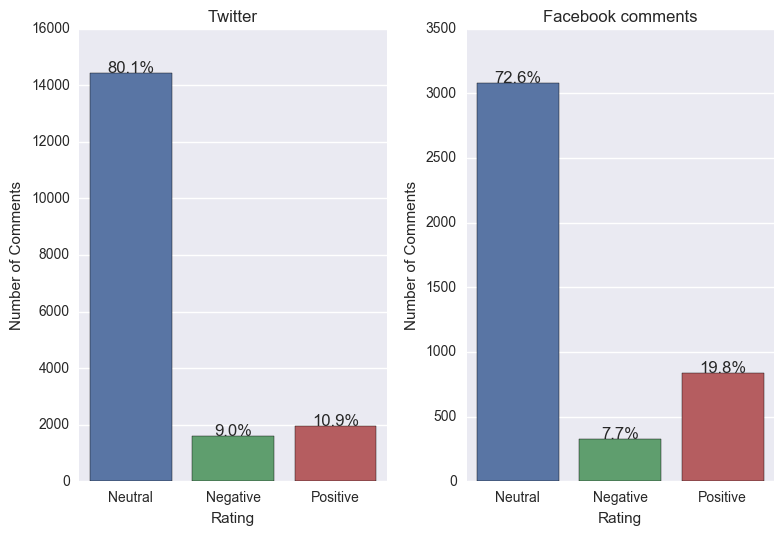

In [86]:
plt.subplot(1, 2, 1)

total1 = float(len(tweets)) # one person per row 

sns.set_style("darkgrid")
ax = sns.countplot(x="tweets_polarity", data=tweets, order=['Neutral', 'Negative', 'Positive'])
ax.set(xlabel='Rating', ylabel='Number of Comments')
for p in ax.patches:
    height1 = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height1 + 3,
            '{:1.1f}%'.format((height1/total1)*100),
            ha="center") 
sns.plt.title('Twitter')

plt.subplot(1, 2, 2)

sns.set_style("darkgrid")
total = float(len(df)) # one person per row 

ax = sns.countplot(x="fb_polarity", data=df, order=['Neutral', 'Negative', 'Positive'])
ax.set(xlabel='Rating', ylabel='Number of Comments')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total) * 100),
            ha="center") 

sns.plt.title('Facebook comments')


plt.tight_layout()



# Clustering Trump's facebook posts: 

What kind of facebook posts get the most reactions? Are they the ones that get the most comments too?


In [ ]:
df2 = pd.read_csv('DonaldTrump_facebook_statuses.csv')

df2.head()

In [ ]:
feature_cols = ['num_reactions', 'num_comments']
X = df2[feature_cols]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# Fitting K-Means to the dataset

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
km = kmeans.fit_predict(X)


In [ ]:
df2['cluster'] = kmeans.labels_
df2 = df2.sort('cluster')
print df2.groupby('cluster').std()




In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
centers = df2.groupby('cluster').mean()

colors = np.array(['red', 'green', 'blue'])
colors = pd.Series(colors)

plt.scatter(df2.num_reactions, df2.num_comments, c=colors[df2.cluster], s=50)
plt.xlabel('Reactions')
plt.ylabel('Comments')

# cluster centers, marked by "+"
plt.scatter(centers.num_reactions, centers.num_comments, linewidths=3, marker='+', s=300, c='black')
#plt.show()

In [ ]:
#comparatively low number of reactions, but high number of comments?


pd.set_option('display.max_colwidth', -1)

s = df2.loc[df2['cluster'] == 2]
print s['status_message']